In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
import re

nltk.download('stopwords')
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12,6)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Aysegul\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [22]:
!pip install wordcloud


In [2]:

df = pd.read_csv("C:/Users/Aysegul/Desktop/kaza/metadata.csv", low_memory=False)

df.head()

,cord_uid,sha,source_x,title,doi,pmcid,pubmed_id,license,abstract,publish_time,authors,journal,mag_id,who_covidence_id,arxiv_id,pdf_json_files,pmc_json_files,url,s2_id
0,ug7v899j,d1aafb70c066a2068b02786f8929fd9c900897fb,PMC,Clinical features of culture-proven Mycoplasma...,10.1186/1471-2334-1-6,PMC35282,11472636,no-cc,OBJECTIVE: This retrospective chart review des...,2001-07-04,"Madani, Tariq A; Al-Ghamdi, Aisha A",BMC Infect Dis,NaN,NaN,NaN,document_parses/pdf_json/d1aafb70c066a2068b027...,document_parses/pmc_json/PMC35282.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3...,NaN
1,02tnwd4m,6b0567729c2143a66d737eb0a2f63f2dce2e5a7d,PMC,Nitric oxide: a pro-inflammatory mediator in l...,10.1186/rr14,PMC59543,11667967,no-cc,Inflammatory diseases of the respiratory tract...,2000-08-15,"Vliet, Albert van der; Eiserich, Jason P; Cros...",Respir Res,NaN,NaN,NaN,document_parses/pdf_json/6b0567729c2143a66d737...,document_parses/pmc_json/PMC59543.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,NaN
2,ejv2xln0,06ced00a5fc04215949aa72528f2eeaae1d58927,PMC,Surfactant protein-D and pulmonary host defense,10.1186/rr19,PMC59549,11667972,no-cc,Surfactant protein-D (SP-D) participates in th...,2000-08-25,"Crouch, Erika C",Respir Res,NaN,NaN,NaN,document_parses/pdf_json/06ced00a5fc04215949aa...,document_parses/pmc_json/PMC59549.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,NaN
3,2b73a28n,348055649b6b8cf2b9a376498df9bf41f7123605,PMC,Role of endothelin-1 in lung disease,10.1186/rr44,PMC59574,11686871,no-cc,Endothelin-1 (ET-1) is a 21 amino acid peptide...,2001-02-22,"Fagan, Karen A; McMurtry, Ivan F; Rodman, David M",Respir Res,NaN,NaN,NaN,document_parses/pdf_json/348055649b6b8cf2b9a37...,document_parses/pmc_json/PMC59574.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,NaN
4,9785vg6d,5f48792a5fa08bed9f56016f4981ae2ca6031b32,PMC,Gene expression in epithelial cells in respons...,10.1186/rr61,PMC59580,11686888,no-cc,Respiratory syncytial virus (RSV) and pneumoni...,2001-05-11,"Domachowske, Joseph B; Bonville, Cynthia A; Ro...",Respir Res,NaN,NaN,NaN,document_parses/pdf_json/5f48792a5fa08bed9f560...,document_parses/pmc_json/PMC59580.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,NaN


In [7]:
df['publish_time'] = pd.to_datetime(df['publish_time'], errors='coerce')
df['year'] = df['publish_time'].dt.year



Genel İstatistikler


In [33]:
print("Toplam Makale Sayısı:", len(df))
print("Yayım Yılları:", df['year'].dropna().unique())
print("En çok kullanılan kaynaklar:\n", df['source_x'].value_counts().head())
print("En sık görülen lisans türleri:\n", df['license'].value_counts().head())

Toplam Makale Sayısı: 1056660
Yayım Yılları: [2001. 2000. 2003. 2004. 2005. 1997. 2006. 2002. 2007. 2008. 2009. 2010.
 2011. 2012. 1998. 1999. 2013. 2014. 2015. 2016. 2017. 2018. 2019. 2020.
 1988. 1996. 1993. 1974. 1990. 1964. 1976. 1987. 1978. 1994. 1991. 1986.
 1982. 1989. 1977. 1992. 1985. 1995. 1984. 1970. 1972. 1973. 1981. 1980.
 1983. 1969. 1975. 1979. 1971. 2021. 2022. 1962. 1968. 1957. 2024. 2023.
 1961. 1965. 1955. 1963. 1967. 1879. 1860. 1900. 1856. 1903. 1878. 1902.
 1857. 1864. 1876.]
En çok kullanılan kaynaklar:
 source_x
WHO                  450459
Medline; PMC         150593
Medline              131531
PMC                   80192
Medline; PMC; WHO     65968
Name: count, dtype: int64
En sık görülen lisans türleri:
 license
unk          601506
no-cc        165314
cc-by        160955
els-covid     32382
cc-by-nc      26046
Name: count, dtype: int64


YILLARA GÖRE YAYIN SAYISI

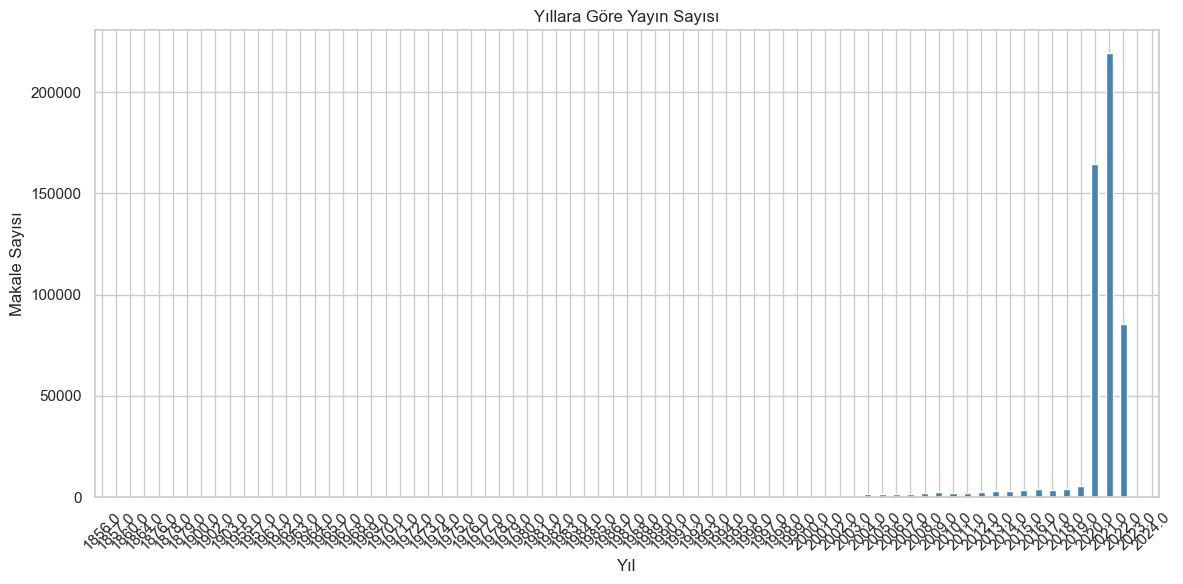

In [35]:
year_counts = df['year'].value_counts().sort_index()
year_counts.plot(kind='bar', color='steelblue')
plt.title("Yıllara Göre Yayın Sayısı")
plt.xlabel("Yıl")
plt.ylabel("Makale Sayısı")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

EN ÇOK KULLANILAN KAYNAKLAR

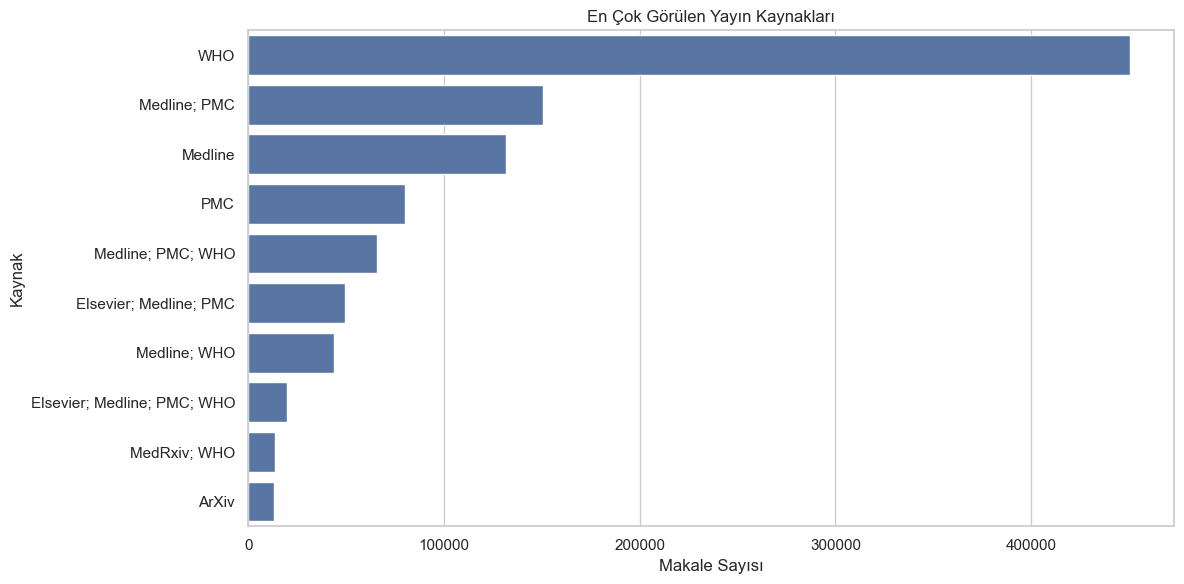

In [37]:
source_counts = df['source_x'].value_counts().head(10)
sns.barplot(x=source_counts.values, y=source_counts.index)
plt.title("En Çok Görülen Yayın Kaynakları")
plt.xlabel("Makale Sayısı")
plt.ylabel("Kaynak")
plt.tight_layout()
plt.show()

EN SIK KULLANILAN DERGİLER

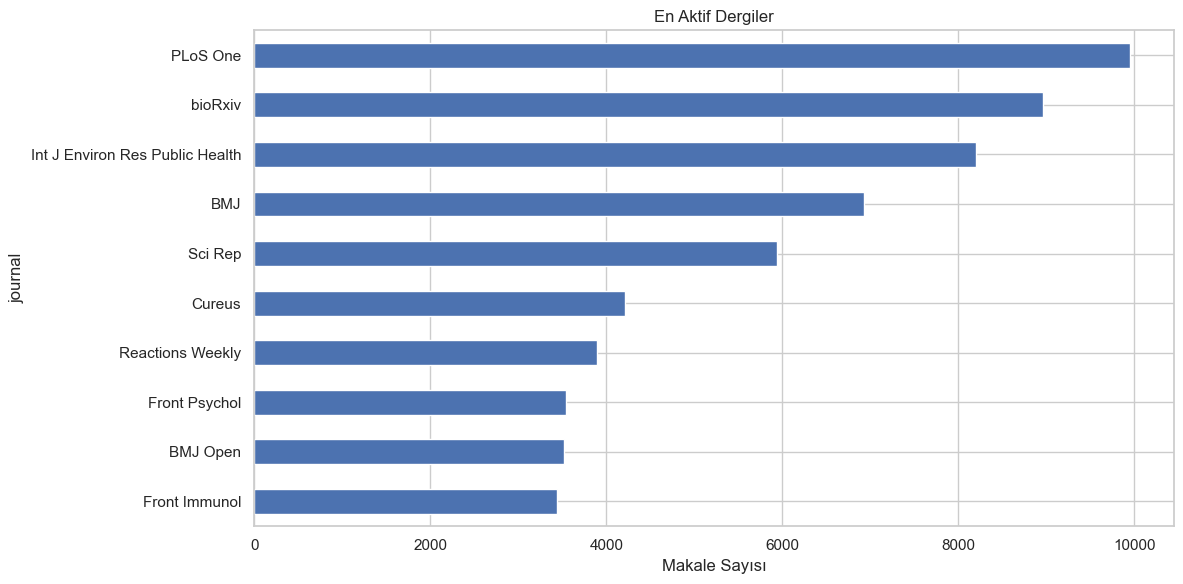

In [39]:
top_journals = df['journal'].value_counts().head(10)
top_journals.plot(kind='barh')
plt.title("En Aktif Dergiler")
plt.xlabel("Makale Sayısı")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

BELİRLİ ANAHTAR KELİMELERLE FİLTRELEME

In [4]:
keywords = ['vaccine', 'mutation', 'transmission', 'variant']
for word in keywords:
    count = df['abstract'].str.contains(word, case=False, na=False).sum()
    print(f"'{word}' kelimesi geçen makale sayısı: {count}")

'vaccine' kelimesi geçen makale sayısı: 61233
'mutation' kelimesi geçen makale sayısı: 16465
'transmission' kelimesi geçen makale sayısı: 56174
'variant' kelimesi geçen makale sayısı: 23354


ANAHTAR KELİMEYE GÖRE YILLARA GÖRE DAĞILIM

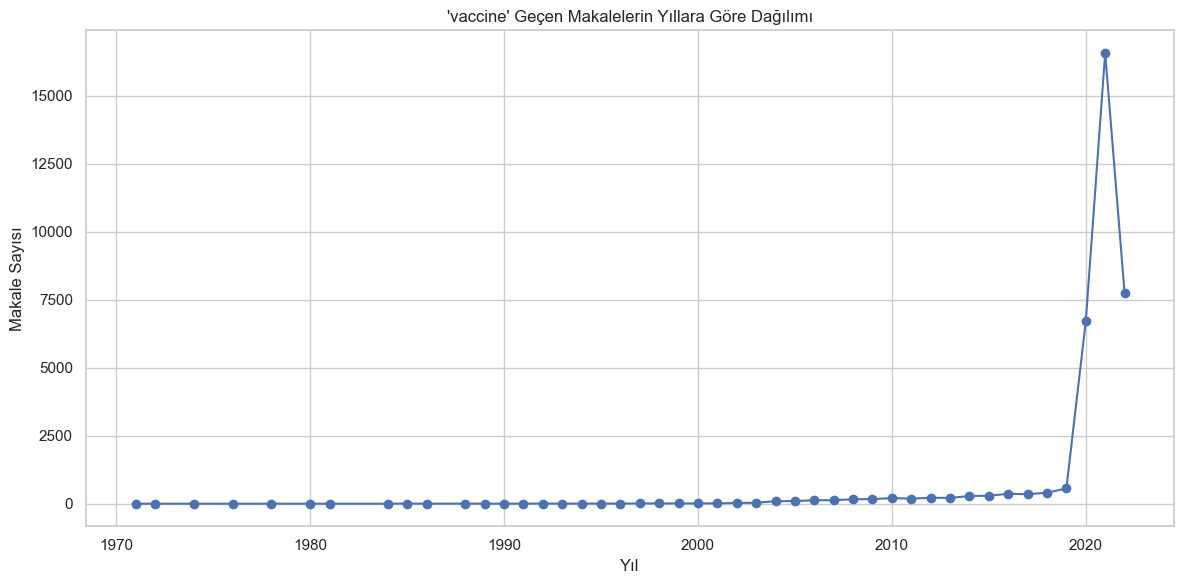

In [9]:
keyword = "vaccine"
df_vaccine = df[df['abstract'].str.contains(keyword, case=False, na=False)]
df_vaccine['year'].value_counts().sort_index().plot(kind='line', marker='o')
plt.title(f"'{keyword}' Geçen Makalelerin Yıllara Göre Dağılımı")
plt.xlabel("Yıl")
plt.ylabel("Makale Sayısı")
plt.grid(True)
plt.tight_layout()
plt.show()

WORDCLOUD – ABSTRACT

In [ ]:
text = ' '.join(df['abstract'].dropna().astype(str).tolist())
text = re.sub(r'[^A-Za-z ]+', '', text.lower())
stop_words = set(stopwords.words('english'))
wordcloud = WordCloud(width=800, height=400, background_color='white',
                      stopwords=stop_words, max_words=100).generate(text)
plt.figure(figsize=(14, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Abstract'larda En Sık Geçen Kelimeler")
plt.tight_layout()
plt.show()